In [182]:
import numpy as np 
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [311]:
df = pd.read_csv("age_gender.csv")

In [312]:
df

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...
...,...,...,...,...,...
23700,99,0,1,20170120221920654.jpg.chip.jpg,127 100 94 81 77 77 74 99 102 98 128 145 160 1...
23701,99,1,1,20170120134639935.jpg.chip.jpg,23 28 32 35 42 47 68 85 98 103 113 117 130 129...
23702,99,2,1,20170110182418864.jpg.chip.jpg,59 50 37 40 34 19 30 101 156 170 177 184 187 1...
23703,99,2,1,20170117195405372.jpg.chip.jpg,45 108 120 156 206 197 140 180 191 199 204 207...


In [313]:
del df["img_name"]
df['pixels']=df['pixels'].apply(lambda x:  np.array(x.split(), dtype="float32"))

In [314]:
df

,age,ethnicity,gender,pixels
0,1,2,0,"[129.0, 128.0, 128.0, 126.0, 127.0, 130.0, 133..."
1,1,2,0,"[164.0, 74.0, 111.0, 168.0, 169.0, 171.0, 175...."
2,1,2,0,"[67.0, 70.0, 71.0, 70.0, 69.0, 67.0, 70.0, 79...."
3,1,2,0,"[193.0, 197.0, 198.0, 200.0, 199.0, 200.0, 202..."
4,1,2,0,"[202.0, 205.0, 209.0, 210.0, 209.0, 209.0, 210..."
...,...,...,...,...
23700,99,0,1,"[127.0, 100.0, 94.0, 81.0, 77.0, 77.0, 74.0, 9..."
23701,99,1,1,"[23.0, 28.0, 32.0, 35.0, 42.0, 47.0, 68.0, 85...."
23702,99,2,1,"[59.0, 50.0, 37.0, 40.0, 34.0, 19.0, 30.0, 101..."
23703,99,2,1,"[45.0, 108.0, 120.0, 156.0, 206.0, 197.0, 140...."


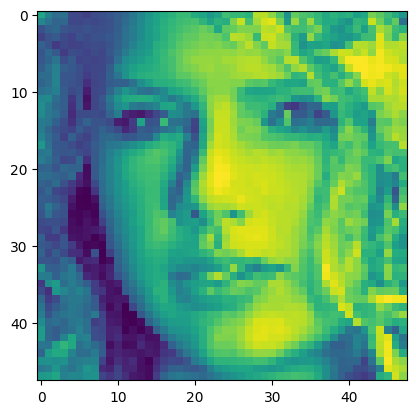

In [368]:
x = np.array(df['pixels'].tolist())
x = x.reshape(x.shape[0],48,48,1)

plt.imshow(x[2000])

<Axes: xlabel='ethnicity', ylabel='Count'>

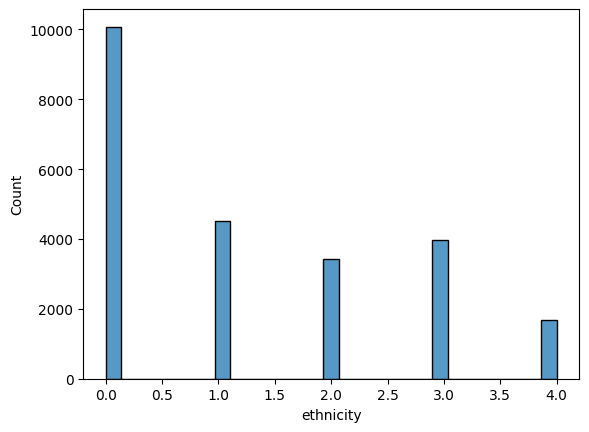

In [188]:
sns.histplot(data=df,x="ethnicity")


<Axes: xlabel='age', ylabel='Count'>

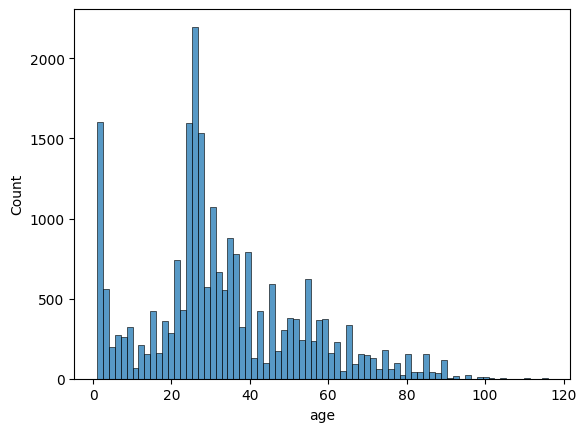

In [189]:
sns.histplot(data=df,x="age")


<Axes: xlabel='gender', ylabel='Count'>

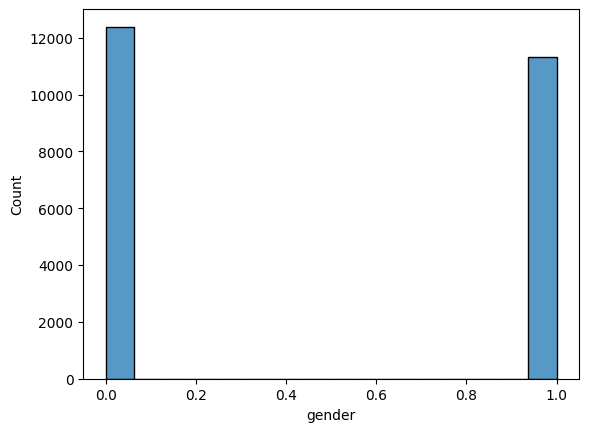

In [190]:
sns.histplot(data=df,x="gender")

In [369]:
x=x/255

***GENDER***

Let's try with a fully connected network to determine the gender

In [317]:
y = df['gender']

In [318]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [319]:
x_train[0]

array([[[0.3529412 ],
        [0.02745098],
        [0.05490196],
        ...,
        [0.26666668],
        [0.21960784],
        [0.2627451 ]],

       [[0.2627451 ],
        [0.03137255],
        [0.06666667],
        ...,
        [0.28235295],
        [0.24313726],
        [0.25490198]],

       [[0.20784314],
        [0.01176471],
        [0.05882353],
        ...,
        [0.3137255 ],
        [0.24705882],
        [0.24705882]],

       ...,

       [[0.1254902 ],
        [0.15294118],
        [0.14901961],
        ...,
        [0.05882353],
        [0.03921569],
        [0.01960784]],

       [[0.14117648],
        [0.16470589],
        [0.16078432],
        ...,
        [0.04313726],
        [0.03137255],
        [0.01568628]],

       [[0.14117648],
        [0.16470589],
        [0.15686275],
        ...,
        [0.03529412],
        [0.03137255],
        [0.01568628]]], dtype=float32)

In [358]:
y_train[0]

0

In [320]:
model_gender_1 = tf.keras.Sequential()
model_gender_1.add(tf.keras.layers.Flatten(input_shape=(48, 48)))
model_gender_1.add(tf.keras.layers.Dense(64,activation="relu"))
model_gender_1.add(tf.keras.layers.Dense(64,activation="relu"))
model_gender_1.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model_gender_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [321]:
epochs = 20
history_gender_1=model_gender_1.fit(x_train, y_train,batch_size=32, epochs=epochs,validation_data=(x_test, y_test))

Epoch 1/20
593/593 [==============================] - 5s 5ms/step - loss: 0.5187 - accuracy: 0.7380 - val_loss: 0.3947 - val_accuracy: 0.8230
Epoch 2/20
593/593 [==============================] - 2s 4ms/step - loss: 0.4183 - accuracy: 0.8062 - val_loss: 0.3609 - val_accuracy: 0.8420
Epoch 3/20
593/593 [==============================] - 2s 4ms/step - loss: 0.3928 - accuracy: 0.8212 - val_loss: 0.3519 - val_accuracy: 0.8439
Epoch 4/20
593/593 [==============================] - 2s 4ms/step - loss: 0.3748 - accuracy: 0.8270 - val_loss: 0.4570 - val_accuracy: 0.7758
Epoch 5/20
593/593 [==============================] - 3s 4ms/step - loss: 0.3702 - accuracy: 0.8270 - val_loss: 0.3371 - val_accuracy: 0.8524
Epoch 6/20
593/593 [==============================] - 2s 4ms/step - loss: 0.3533 - accuracy: 0.8347 - val_loss: 0.3449 - val_accuracy: 0.8467
Epoch 7/20
593/593 [==============================] - 2s 4ms/step - loss: 0.3638 - accuracy: 0.8322 - val_loss: 0.3533 - val_accuracy: 0.8327
Epoch 

In [248]:
def plot_figs(epochs,hist):
    fig, ax = plt.subplots(1,2,figsize=(12,5))
    values = ["accuracy","loss"]
    for i in range(2):
        ax[i].plot(range(epochs),hist.history[values[i]],label=values[i])
        ax[i].plot(range(epochs),hist.history['val_'+values[i]],label='val_'+values[i])
        ax[i].set_ylabel(values[i])
        ax[i].set_xlabel("epochs")
        ax[i].set_title(values[i]+" evolution")
        ax[i].legend()
    plt.show()

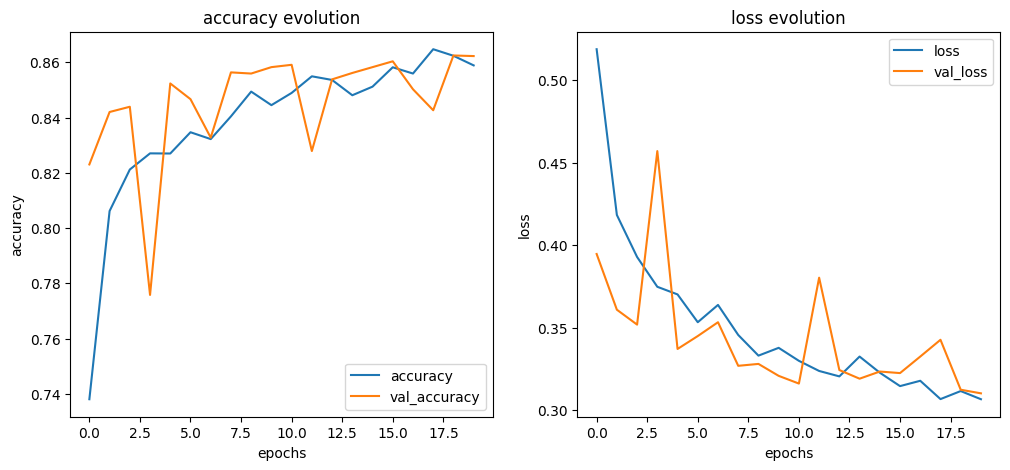

In [322]:
plot_figs(epochs,history_gender_1)

In [323]:
model_gender_2 = tf.keras.Sequential()
model_gender_2.add(tf.keras.layers.Flatten(input_shape=(48, 48)))
model_gender_2.add(tf.keras.layers.Dense(128,activation="relu"))
model_gender_2.add(tf.keras.layers.Dense(64,activation="relu"))
model_gender_2.add(tf.keras.layers.Dense(64,activation="relu"))
model_gender_2.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model_gender_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [324]:
history_gender_2=model_gender_2.fit(x_train, y_train,batch_size=32, epochs=epochs,validation_data=(x_test, y_test))

Epoch 1/20
593/593 [==============================] - 5s 5ms/step - loss: 0.5174 - accuracy: 0.7412 - val_loss: 0.4458 - val_accuracy: 0.8072
Epoch 2/20
593/593 [==============================] - 3s 5ms/step - loss: 0.4275 - accuracy: 0.7983 - val_loss: 0.3623 - val_accuracy: 0.8374
Epoch 3/20
593/593 [==============================] - 3s 5ms/step - loss: 0.3870 - accuracy: 0.8211 - val_loss: 0.3579 - val_accuracy: 0.8433
Epoch 4/20
593/593 [==============================] - 3s 5ms/step - loss: 0.3842 - accuracy: 0.8196 - val_loss: 0.3445 - val_accuracy: 0.8467
Epoch 5/20
593/593 [==============================] - 3s 5ms/step - loss: 0.3646 - accuracy: 0.8303 - val_loss: 0.3385 - val_accuracy: 0.8515
Epoch 6/20
593/593 [==============================] - 3s 5ms/step - loss: 0.3560 - accuracy: 0.8357 - val_loss: 0.3323 - val_accuracy: 0.8469
Epoch 7/20
593/593 [==============================] - 3s 5ms/step - loss: 0.3473 - accuracy: 0.8419 - val_loss: 0.3387 - val_accuracy: 0.8408
Epoch 

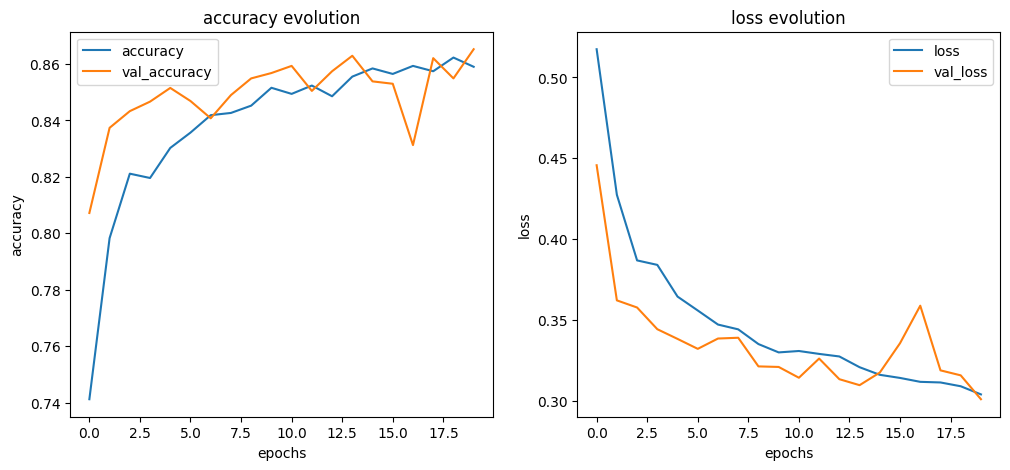

In [325]:
plot_figs(epochs,history_gender_2)

In [326]:
model_gender_3 = tf.keras.Sequential()
model_gender_3.add(tf.keras.layers.Flatten(input_shape=(48, 48)))
model_gender_3.add(tf.keras.layers.Dense(512,activation="relu"))
model_gender_3.add(tf.keras.layers.Dense(256,activation="relu"))
model_gender_3.add(tf.keras.layers.Dense(128,activation="relu"))
model_gender_3.add(tf.keras.layers.Dense(64,activation="relu"))
model_gender_3.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model_gender_3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [327]:
history_gender_3=model_gender_3.fit(x_train, y_train,batch_size=32, epochs=epochs,validation_data=(x_test, y_test))

Epoch 1/20
593/593 [==============================] - 11s 16ms/step - loss: 0.5257 - accuracy: 0.7373 - val_loss: 0.5000 - val_accuracy: 0.7688
Epoch 2/20
593/593 [==============================] - 9s 15ms/step - loss: 0.4244 - accuracy: 0.8024 - val_loss: 0.3936 - val_accuracy: 0.8315
Epoch 3/20
593/593 [==============================] - 9s 15ms/step - loss: 0.4001 - accuracy: 0.8141 - val_loss: 0.3618 - val_accuracy: 0.8342
Epoch 4/20
593/593 [==============================] - 9s 15ms/step - loss: 0.3868 - accuracy: 0.8210 - val_loss: 0.3472 - val_accuracy: 0.8462
Epoch 5/20
593/593 [==============================] - 9s 15ms/step - loss: 0.3691 - accuracy: 0.8325 - val_loss: 0.3384 - val_accuracy: 0.8473
Epoch 6/20
593/593 [==============================] - 9s 15ms/step - loss: 0.3701 - accuracy: 0.8280 - val_loss: 0.3562 - val_accuracy: 0.8450
Epoch 7/20
593/593 [==============================] - 9s 15ms/step - loss: 0.3570 - accuracy: 0.8352 - val_loss: 0.3938 - val_accuracy: 0.804

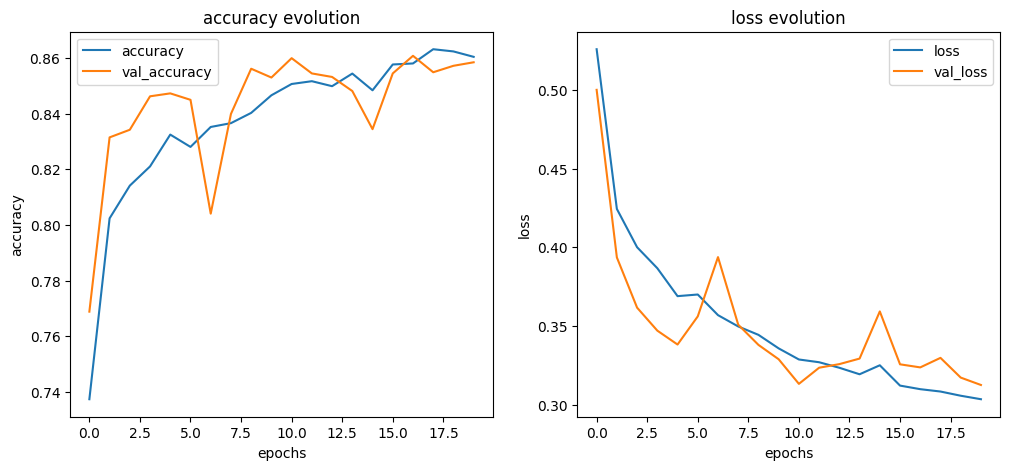

In [328]:
plot_figs(epochs,history_gender_3)

In [331]:
model_gender_4 = tf.keras.Sequential()
model_gender_4.add(tf.keras.layers.Flatten(input_shape=(48, 48)))
model_gender_4.add(tf.keras.layers.Dense(512,activation="relu"))
model_gender_4.add(tf.keras.layers.Dense(256,activation="relu"))
model_gender_4.add(tf.keras.layers.Dense(128,activation="relu"))
model_gender_4.add(tf.keras.layers.Dense(64,activation="relu"))
model_gender_4.add(tf.keras.layers.Dense(32,activation="relu"))
model_gender_4.add(tf.keras.layers.Dropout(0.5))
model_gender_4.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model_gender_4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [332]:
history_gender_4=model_gender_4.fit(x_train, y_train,batch_size=32, epochs=epochs,validation_data=(x_test, y_test))

Epoch 1/20
593/593 [==============================] - 11s 16ms/step - loss: 0.5824 - accuracy: 0.6914 - val_loss: 0.4473 - val_accuracy: 0.7990
Epoch 2/20
593/593 [==============================] - 9s 16ms/step - loss: 0.4634 - accuracy: 0.7918 - val_loss: 0.3843 - val_accuracy: 0.8281
Epoch 3/20
593/593 [==============================] - 10s 18ms/step - loss: 0.4223 - accuracy: 0.8091 - val_loss: 0.3800 - val_accuracy: 0.8308
Epoch 4/20
593/593 [==============================] - 9s 15ms/step - loss: 0.3978 - accuracy: 0.8226 - val_loss: 0.3914 - val_accuracy: 0.8448
Epoch 5/20
593/593 [==============================] - 9s 15ms/step - loss: 0.3856 - accuracy: 0.8270 - val_loss: 0.3349 - val_accuracy: 0.8496
Epoch 6/20
593/593 [==============================] - 9s 15ms/step - loss: 0.3773 - accuracy: 0.8301 - val_loss: 0.3323 - val_accuracy: 0.8530
Epoch 7/20
593/593 [==============================] - 9s 15ms/step - loss: 0.3659 - accuracy: 0.8353 - val_loss: 0.3427 - val_accuracy: 0.84

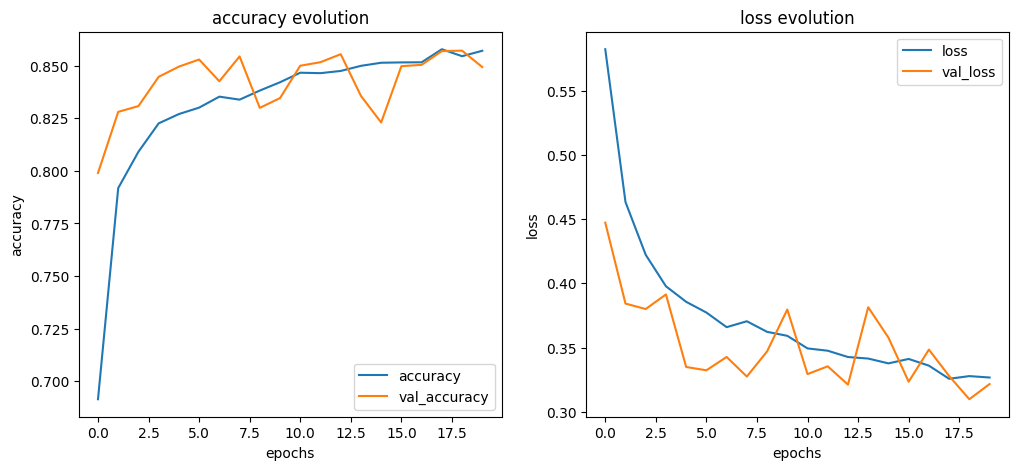

In [333]:
plot_figs(epochs,history_gender_4)

CNN network

In [334]:
model_gender_5 = tf.keras.Sequential()
model_gender_5.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1))) 
model_gender_5.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_gender_5.add(tf.keras.layers.Flatten())
model_gender_5.add(tf.keras.layers.Dense(64, activation='relu'))
model_gender_5.add(tf.keras.layers.Dense(1, activation='sigmoid'))  
model_gender_5.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [335]:
history_gender_5=model_gender_5.fit(x_train, y_train,batch_size=32, epochs=epochs,validation_data=(x_test, y_test))

Epoch 1/20
593/593 [==============================] - 22s 34ms/step - loss: 0.4341 - accuracy: 0.7994 - val_loss: 0.3557 - val_accuracy: 0.8456
Epoch 2/20
593/593 [==============================] - 19s 32ms/step - loss: 0.3337 - accuracy: 0.8566 - val_loss: 0.3112 - val_accuracy: 0.8659
Epoch 3/20
593/593 [==============================] - 20s 33ms/step - loss: 0.2953 - accuracy: 0.8739 - val_loss: 0.2834 - val_accuracy: 0.8812
Epoch 4/20
593/593 [==============================] - 19s 33ms/step - loss: 0.2704 - accuracy: 0.8847 - val_loss: 0.2701 - val_accuracy: 0.8865
Epoch 5/20
593/593 [==============================] - 19s 33ms/step - loss: 0.2523 - accuracy: 0.8933 - val_loss: 0.2777 - val_accuracy: 0.8855
Epoch 6/20
593/593 [==============================] - 19s 33ms/step - loss: 0.2321 - accuracy: 0.9029 - val_loss: 0.2745 - val_accuracy: 0.8876
Epoch 7/20
593/593 [==============================] - 19s 32ms/step - loss: 0.2169 - accuracy: 0.9114 - val_loss: 0.2635 - val_accuracy:

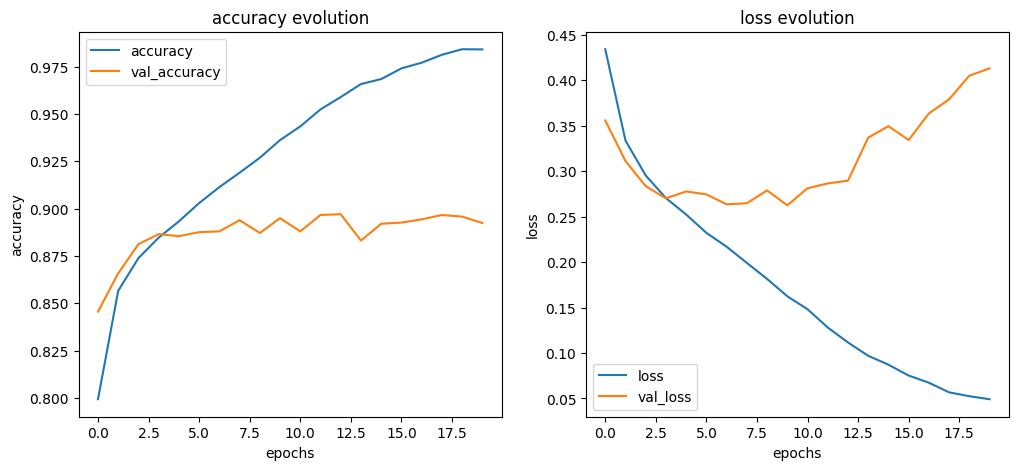

In [336]:
plot_figs(epochs,history_gender_5)

In [337]:
model_gender_6 = tf.keras.Sequential()
model_gender_6.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model_gender_6.add(tf.keras.layers.MaxPooling2D((2, 2))) 
model_gender_6.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))  
model_gender_6.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_gender_6.add(tf.keras.layers.Flatten())
model_gender_6.add(tf.keras.layers.Dense(128, activation='relu'))
model_gender_6.add(tf.keras.layers.Dropout(0.5))
model_gender_6.add(tf.keras.layers.Dense(1, activation='sigmoid'))  
model_gender_6.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [338]:
history_gender_6=model_gender_6.fit(x_train, y_train,batch_size=32, epochs=epochs,validation_data=(x_test, y_test))

Epoch 1/20
593/593 [==============================] - 44s 71ms/step - loss: 0.4192 - accuracy: 0.8007 - val_loss: 0.3254 - val_accuracy: 0.8547
Epoch 2/20
593/593 [==============================] - 39s 66ms/step - loss: 0.3164 - accuracy: 0.8595 - val_loss: 0.3173 - val_accuracy: 0.8532
Epoch 3/20
593/593 [==============================] - 38s 64ms/step - loss: 0.2863 - accuracy: 0.8750 - val_loss: 0.2599 - val_accuracy: 0.8846
Epoch 4/20
593/593 [==============================] - 39s 65ms/step - loss: 0.2621 - accuracy: 0.8844 - val_loss: 0.2499 - val_accuracy: 0.8905
Epoch 5/20
593/593 [==============================] - 39s 66ms/step - loss: 0.2498 - accuracy: 0.8918 - val_loss: 0.2422 - val_accuracy: 0.8975
Epoch 6/20
593/593 [==============================] - 38s 64ms/step - loss: 0.2343 - accuracy: 0.9009 - val_loss: 0.2352 - val_accuracy: 0.8975
Epoch 7/20
593/593 [==============================] - 39s 66ms/step - loss: 0.2187 - accuracy: 0.9060 - val_loss: 0.2427 - val_accuracy:

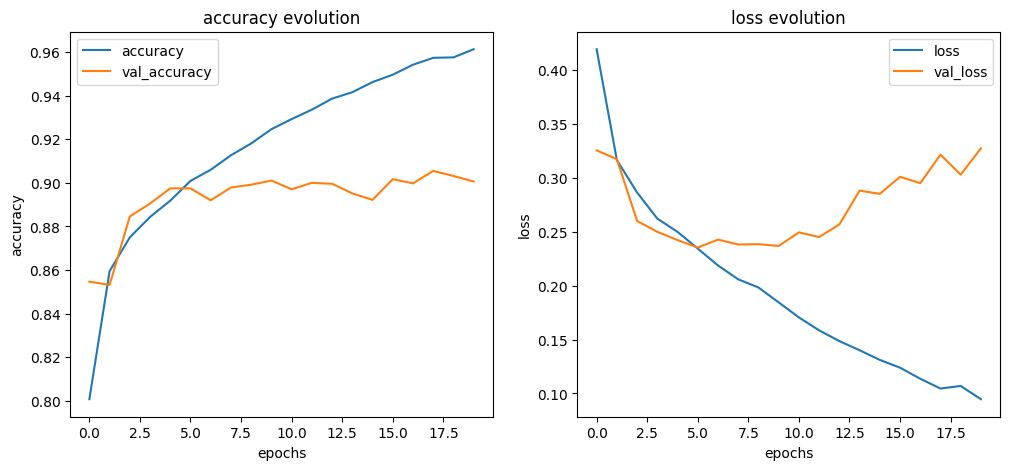

In [339]:
plot_figs(epochs,history_gender_6)

In [340]:
model_gender_7 = tf.keras.Sequential()
model_gender_7.add(tf.keras.layers.Conv2D(30, (5, 5), strides=(1, 1), activation='relu', input_shape=(48, 48, 1)))
model_gender_7.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2))) 
model_gender_7.add(tf.keras.layers.Conv2D(15, (3, 3), strides=(1, 1), activation='relu'))  
model_gender_7.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_gender_7.add(tf.keras.layers.Dropout(0.3))
model_gender_7.add(tf.keras.layers.Flatten())
model_gender_7.add(tf.keras.layers.Dense(128, activation='relu'))
model_gender_7.add(tf.keras.layers.Dense(50, activation='relu'))
model_gender_7.add(tf.keras.layers.Dense(1, activation='sigmoid'))  
model_gender_7.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [341]:
history_gender_7=model_gender_7.fit(x_train, y_train,batch_size=32, epochs=epochs,validation_data=(x_test, y_test))

Epoch 1/20
593/593 [==============================] - 43s 68ms/step - loss: 0.4440 - accuracy: 0.7854 - val_loss: 0.3374 - val_accuracy: 0.8450
Epoch 2/20
593/593 [==============================] - 41s 69ms/step - loss: 0.3466 - accuracy: 0.8415 - val_loss: 0.3179 - val_accuracy: 0.8538
Epoch 3/20
593/593 [==============================] - 41s 68ms/step - loss: 0.3215 - accuracy: 0.8538 - val_loss: 0.2898 - val_accuracy: 0.8637
Epoch 4/20
593/593 [==============================] - 42s 70ms/step - loss: 0.2992 - accuracy: 0.8655 - val_loss: 0.3301 - val_accuracy: 0.8435
Epoch 5/20
593/593 [==============================] - 44s 74ms/step - loss: 0.2878 - accuracy: 0.8712 - val_loss: 0.2677 - val_accuracy: 0.8785
Epoch 6/20
593/593 [==============================] - 41s 69ms/step - loss: 0.2729 - accuracy: 0.8791 - val_loss: 0.2837 - val_accuracy: 0.8734
Epoch 7/20
593/593 [==============================] - 41s 70ms/step - loss: 0.2591 - accuracy: 0.8853 - val_loss: 0.2510 - val_accuracy:

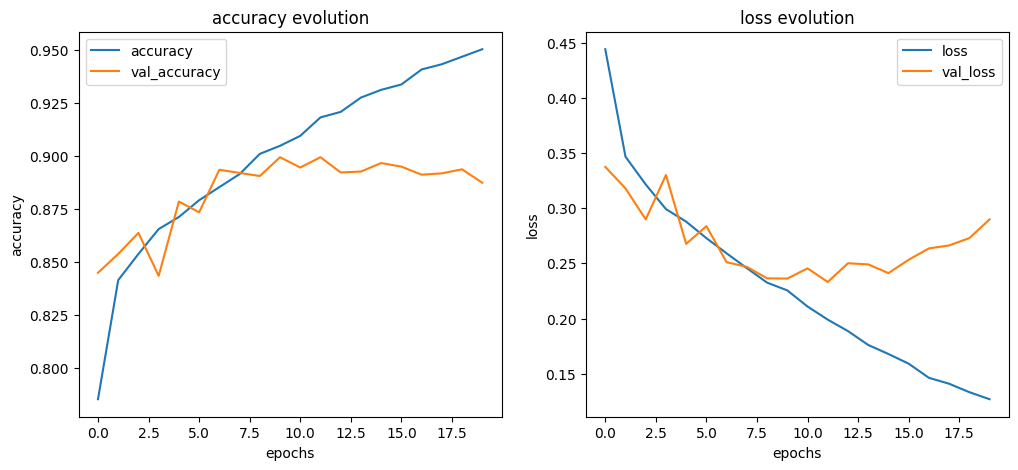

In [342]:
plot_figs(epochs,history_gender_7)

In [345]:
from PIL import Image

image_val = Image.open('val.jpg','r')
image_val = image_val.convert('L')
pixels_val = list(image_val.getdata())

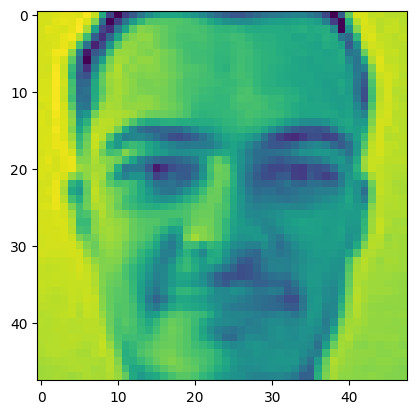

In [346]:
pixels_val = np.array(pixels_val)/255
pixels_val = pixels_val.reshape(1,48,48,1)

plt.imshow(pixels_val[0])

In [350]:
model_gender_6.predict(pixels_val)

1/1 [==============================] - 0s 100ms/step


array([[0.07682499]], dtype=float32)

In [351]:
image_test_femme = Image.open('test_femme.png','r')
image_test_femme = image_test_femme.convert('L')
pixels_test_femme = list(image_test_femme.getdata())

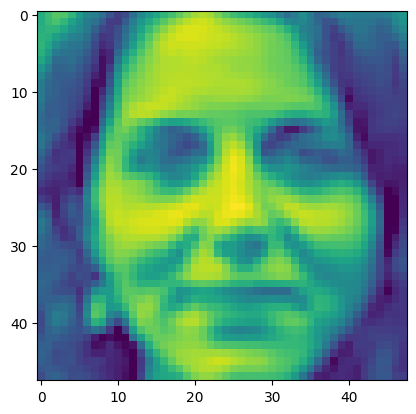

In [352]:
pixels_test_femme = np.array(pixels_test_femme)/255
pixels_test_femme = pixels_test_femme.reshape(1,48,48,1)

plt.imshow(pixels_test_femme[0])

In [354]:
model_gender_6.predict(pixels_test_femme)

1/1 [==============================] - 0s 121ms/step


array([[0.9960421]], dtype=float32)

***AGE***